## Data Analytics Project | Marketing Campaign Effectiveness Analysis | Python

## Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Datasets

In [3]:
customer_demographic_data = pd.read_csv(r"C:\phython files\Datasets\Datasets\customer_demographic_data.csv")
customer_demographic_data.head()

,Customer ID,Age,Gender,Location,Income Level
0,1,65,Male,Martinezmouth,61083
1,2,43,Non-binary,South Anne,90419
2,3,58,Non-binary,West Darrellport,38260
3,4,53,Non-binary,Stevenshire,34649
4,5,69,Female,South Kellychester,70420


In [4]:
customer_interactions_data =pd.read_csv(r"C:\phython files\Datasets\Datasets\customer_interactions.csv")
customer_interactions_data.head()

,Customer ID,Interaction Date,Interaction Type,Interaction Channel
0,1,2/28/2024,share,website
1,2,4/27/2024,view,social media
2,3,2/26/2024,share,email
3,4,2/13/2024,click,email
4,5,4/1/2024,share,social media


In [6]:
sales_data = pd.read_csv(r"C:\phython files\Datasets\Datasets\sales_data.csv")
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,1/19/2024,213,345,Books,295.15,7
1,2,6/11/2024,59,134,Electronics,457.78,1
2,3,1/10/2024,178,89,Electronics,423.84,2
3,4,5/30/2024,359,423,Home & Kitchen,497.52,1
4,5,3/21/2024,384,139,Clothing,164.21,7


## Data Cleaning 

### Customer Demographic Data

In [7]:
customer_demographic_data.dtypes

Customer ID      int64
Age              int64
Gender          object
Location        object
Income Level     int64
dtype: object

In [8]:
customer_demographic_data.isnull().sum()

Customer ID     0
Age             0
Gender          0
Location        0
Income Level    0
dtype: int64

## Customer Interaction Data

In [9]:
customer_interactions_data.dtypes

Customer ID             int64
Interaction Date       object
Interaction Type       object
Interaction Channel    object
dtype: object

In [10]:
customer_interactions_data["Interaction Date"]=customer_interactions_data["Interaction Date"].astype("datetime64[ns]")

In [11]:
customer_interactions_data.dtypes

Customer ID                     int64
Interaction Date       datetime64[ns]
Interaction Type               object
Interaction Channel            object
dtype: object

In [12]:
customer_interactions_data.isnull().sum()

Customer ID             0
Interaction Date        0
Interaction Type        0
Interaction Channel    11
dtype: int64

In [14]:
customer_interactions_data.shape

(1000, 4)

In [15]:
customer_interactions_data['Interaction Channel'].value_counts()

Interaction Channel
website         334
email           329
social media    326
Name: count, dtype: int64

In [17]:
customer_interactions_data['Interaction Channel'].fillna('website',inplace=True)

In [18]:
customer_interactions_data.isnull().sum()

Customer ID            0
Interaction Date       0
Interaction Type       0
Interaction Channel    0
dtype: int64

## Sales Data

In [19]:
sales_data.dtypes

Transaction ID        int64
Transaction Date     object
Customer ID           int64
Product ID            int64
Product Category     object
Sales Amount        float64
Quantity              int64
dtype: object

In [20]:
sales_data['Transaction Date']=sales_data['Transaction Date'].astype('datetime64[ns]')

In [21]:
sales_data.dtypes

Transaction ID               int64
Transaction Date    datetime64[ns]
Customer ID                  int64
Product ID                   int64
Product Category            object
Sales Amount               float64
Quantity                     int64
dtype: object

In [22]:
sales_data.isnull().sum()

Transaction ID      0
Transaction Date    0
Customer ID         0
Product ID          0
Product Category    0
Sales Amount        0
Quantity            0
dtype: int64

# Data Analysis

### How many customers interacted with our campaign materials, and what was the engagement rate?

### Total customers interacted with our campaign

In [23]:
customer_interactions_data['Customer ID'].nunique()

1000

### Total customers interacted with our campaign by Type

In [25]:
total_cust_intr_type=(customer_interactions_data['Interaction Type'].value_counts()/1000)*100
total_cust_intr_type

Interaction Type
share    35.6
click    32.6
view     31.8
Name: count, dtype: float64

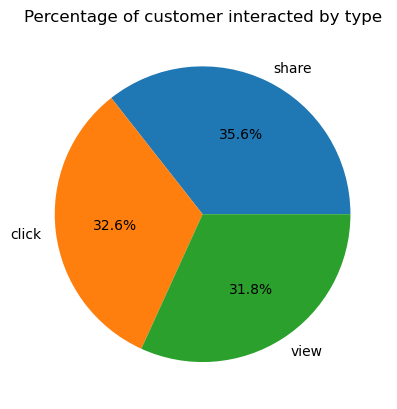

In [28]:
plt.pie(total_cust_intr_type,labels = total_cust_intr_type.index,autopct = '%1.1f%%')
plt.title('Percentage of customer interacted by type')
plt.show()

### Total customers interacted with our campaign by Channel

In [29]:
total_cust_intr_channel = customer_interactions_data['Interaction Channel'].value_counts()
total_cust_intr_channel

Interaction Channel
website         345
email           329
social media    326
Name: count, dtype: int64

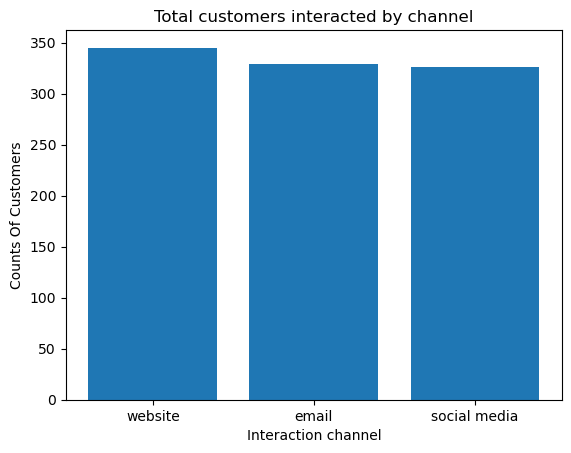

In [30]:
plt.bar(total_cust_intr_channel.index,total_cust_intr_channel.values)
plt.title('Total customers interacted by channel')
plt.xlabel('Interaction channel')
plt.ylabel('Counts Of Customers')
plt.show()

### Engagement Rate for the Campaign

In [32]:
# total targeted customer is 1500
engagement_rate = (1000/1500)*100
print('Engagement Rate :',round(engagement_rate,2),'%')

Engagement Rate : 66.67 %


### What percentage of engaged customers made a purchase, and how does this compare to our targets?

In [33]:
cust_intr_purch=customer_interactions_data.merge(sales_data,on='Customer ID',how='inner')
cust_intr_purch.head()

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-02-28,share,website,178,2024-05-31,88,Home & Kitchen,372.84,6
1,2,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7


In [34]:
total_cust_intr_purch = cust_intr_purch['Customer ID'].nunique()
total_cust_intr_purch

656

In [36]:
purch_rate_targeted=(total_cust_intr_purch/1500)*100
purch_rate_engaged=(total_cust_intr_purch/1000)*100

print('Purchase rate by targeted customers :',round(purch_rate_targeted,2),'%')
print('Purchase rate by engaged customers :',round(purch_rate_engaged,2),'%')

Purchase rate by targeted customers : 43.73 %
Purchase rate by engaged customers : 65.6 %


### What was the overall impact on sales? Did we see a significant increase in sales during and after the campaign period?

### Total sales during the campaign

In [37]:
sales_data['Transaction Date'].min()

Timestamp('2024-01-01 00:00:00')

In [38]:
sales_data['Transaction Date'].max()

Timestamp('2024-07-06 00:00:00')

In [39]:
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-01-19,213,345,Books,295.15,7
1,2,2024-06-11,59,134,Electronics,457.78,1
2,3,2024-01-10,178,89,Electronics,423.84,2
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1
4,5,2024-03-21,384,139,Clothing,164.21,7


In [41]:
sales_data['Sales'] = sales_data['Sales Amount']* sales_data['Quantity']
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales
0,1,2024-01-19,213,345,Books,295.15,7,2066.05
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47


In [42]:
sales_data['Month']=sales_data['Transaction Date'].dt.month
sales_data['Day']=sales_data['Transaction Date'].dt.day
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales,Month,Day
0,1,2024-01-19,213,345,Books,295.15,7,2066.05,1,19
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78,6,11
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68,1,10
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52,5,30
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47,3,21


In [49]:
sales_campaign=sales_data[sales_data['Month']< 5]['Sales']

In [50]:
sales_campaign

0       2066.05
2        847.68
4       1149.47
5       2875.20
6        977.55
         ...   
1362     378.48
1364     440.93
1365    2882.76
1366     286.68
1369    1762.14
Name: Sales, Length: 918, dtype: float64

In [48]:
total_sales_campaign=sum(sales_campaign)
print('Total Sales during campaign :',round(total_sales_campaign,2))

Total Sales during campaign : 1308551.48


### Total sales after the campaign

In [51]:
sales_after_campaign=sales_data[sales_data['Month']> 4]['Sales']
sales_after_campaign

1        457.78
3        497.52
9       1014.58
10       659.16
15      4341.80
         ...   
1360    1022.36
1361    3395.34
1363    2393.30
1367     481.28
1368    1094.80
Name: Sales, Length: 452, dtype: float64

In [52]:
total_sales_after_campaign=sum(sales_after_campaign)
print('Total Sales after campaign :',round(total_sales_after_campaign,2))

Total Sales after campaign : 637323.82


###  Increase/decrease rate of sales

In [53]:
sales_incr_rate=((total_sales_campaign - total_sales_after_campaign)/total_sales_after_campaign)*100
print("Sales increase rate :",round(sales_incr_rate,2),'%')

Sales increase rate : 105.32 %


### How does the ROI of this campaign compare to previous ones? Was our spending justified by the results?

### ROI of recent campaign

In [54]:
roi_recent_camp=((total_sales_campaign-50000)/50000) * 100
print("ROI of recent campaign",round(roi_recent_camp,2))

ROI of recent campaign 2517.1


In [56]:
roi_previous_camp=((268009-57000)/57000) * 100
print("ROI of previous campaign",round(roi_previous_camp,2))

ROI of previous campaign 370.19


In [58]:
roi_growth = ((roi_recent_camp - roi_previous_camp)/roi_previous_camp) * 100
print('ROI growth rate :',round(roi_growth,2),'%')

ROI growth rate : 579.95 %


### Which customer demographics responded most positively or negatively to the campaign? Are there specific segments we should focus on or avoid in the future?

### Customer engagement rates by segments

In [59]:
interacted_cust_data=customer_demographic_data.merge(customer_interactions_data,on='Customer ID',how='inner')
interacted_cust_data.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
0,1,65,Male,Martinezmouth,61083,2024-02-28,share,website
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media
2,3,58,Non-binary,West Darrellport,38260,2024-02-26,share,email
3,4,53,Non-binary,Stevenshire,34649,2024-02-13,click,email
4,5,69,Female,South Kellychester,70420,2024-04-01,share,social media


In [60]:
young_low_income_intr = interacted_cust_data[(interacted_cust_data['Age']>17) & (interacted_cust_data['Age']< 25) & (interacted_cust_data['Income Level']<30000)]
young_low_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
51,52,20,Other,Dianaton,19176,2024-05-04,view,social media
64,65,21,Male,Lukemouth,26780,2024-01-18,click,social media
92,93,20,Other,Port Marvin,23532,2024-03-11,view,social media
114,115,20,Female,Lake Robertfurt,14709,2024-02-06,share,website
138,139,23,Non-binary,Cherylburgh,19490,2024-04-05,view,email


In [61]:
young_medium_income_intr = interacted_cust_data[(interacted_cust_data['Age']>17) & (interacted_cust_data['Age']< 25) & (interacted_cust_data['Income Level']>30000) & (interacted_cust_data['Income Level']<75000)]
young_medium_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
8,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email
12,13,23,Non-binary,Port Vincent,46646,2024-02-01,share,social media
20,21,19,Non-binary,Paceview,53522,2024-04-27,share,website
72,73,22,Non-binary,Sherriton,55401,2024-02-05,click,social media
82,83,19,Female,Gibbsstad,44655,2024-03-02,click,email


In [62]:
middle_high_income_intr = interacted_cust_data[(interacted_cust_data['Age']>24)  & (interacted_cust_data['Income Level']>75000)]
middle_high_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media
6,7,43,Male,Lake Joseph,89845,2024-03-03,click,website
9,10,37,Non-binary,Port Andrew,81745,2024-05-01,share,email
16,17,66,Other,East Jessica,95692,2024-04-16,click,email
19,20,41,Male,North David,77251,2024-03-11,click,website


In [68]:
young_low_income_intr_cust=young_low_income_intr['Customer ID'].nunique()
egr_young_low_income_intr_cust=(young_low_income_intr_cust/1000)*100
round(egr_young_low_income_intr_cust,2)

2.9

In [70]:
young_medium_income_intr_cust=young_medium_income_intr['Customer ID'].nunique()
egr_young_medium_income_intr_cust = (young_medium_income_intr_cust/1000)*100
round(egr_young_medium_income_intr_cust,2)

7.7

In [72]:
middle_high_income_intr_cust=middle_high_income_intr['Customer ID'].nunique()
egr_middle_high_income_intr_cust= (middle_high_income_intr_cust/1000)*100
round(egr_middle_high_income_intr_cust,2)

22.8

### Customer conversion rates by segments

In [76]:
converted_cust_data = customer_demographic_data.merge(cust_intr_purch,on='Customer ID',how='inner')
converted_cust_data.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
0,1,65,Male,Martinezmouth,61083,2024-02-28,share,website,178,2024-05-31,88,Home & Kitchen,372.84,6
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7


In [77]:
young_low_income_cnvr = converted_cust_data[(converted_cust_data['Age']>17) & (converted_cust_data['Age']< 25) & (converted_cust_data['Income Level']<30000)]
young_low_income_cnvr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
85,52,20,Other,Dianaton,19176,2024-05-04,view,social media,849,2024-05-19,88,Books,488.03,4
86,52,20,Other,Dianaton,19176,2024-05-04,view,social media,1105,2024-04-27,195,Home & Kitchen,264.88,3
101,65,21,Male,Lukemouth,26780,2024-01-18,click,social media,584,2024-02-25,31,Clothing,313.44,6
168,115,20,Female,Lake Robertfurt,14709,2024-02-06,share,website,1356,2024-02-27,128,Toys,43.71,6
209,139,23,Non-binary,Cherylburgh,19490,2024-04-05,view,email,616,2024-02-23,177,Toys,284.77,10


In [78]:
young_medium_income_cnvr = converted_cust_data[(converted_cust_data['Age']>17) & (converted_cust_data['Age']< 25) & (converted_cust_data['Income Level']>30000) & (converted_cust_data['Income Level']<75000)]
young_medium_income_cnvr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
11,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email,64,2024-02-02,372,Books,492.84,5
12,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email,119,2024-02-26,162,Home & Kitchen,425.09,3
13,9,24,Non-binary,East Melanie,43329,2024-04-08,click,email,1205,2024-03-14,232,Toys,188.41,3
30,21,19,Non-binary,Paceview,53522,2024-04-27,share,website,491,2024-03-25,207,Electronics,489.17,2
31,21,19,Non-binary,Paceview,53522,2024-04-27,share,website,581,2024-06-25,231,Home & Kitchen,110.57,7


In [79]:
middle_high_income_cnvr= converted_cust_data[(converted_cust_data['Age']>24)  & (converted_cust_data['Income Level']>75000)]
middle_high_income_cnvr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
1,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,43,Non-binary,South Anne,90419,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7
14,10,37,Non-binary,Port Andrew,81745,2024-05-01,share,email,342,2024-01-06,116,Books,11.30,1


In [80]:
young_low_income_cnvr_cust=young_low_income_cnvr['Customer ID'].nunique()
cnvr_young_low_income_cust=(young_low_income_cnvr_cust/total_cust_intr_purch)*100
round(cnvr_young_low_income_cust,2)

2.74

In [81]:
young_medium_income_cnvr_cust=young_medium_income_cnvr['Customer ID'].nunique()
cnvr_young_medium_income_cust=(young_medium_income_cnvr_cust/total_cust_intr_purch)*100
round(cnvr_young_medium_income_cust,2)

8.38

In [82]:
middle_high_income_cnvr_cust=middle_high_income_cnvr['Customer ID'].nunique()
cnvr_middle_high_income_cust=(middle_high_income_cnvr_cust/total_cust_intr_purch)*100
round(cnvr_middle_high_income_cust,2)

22.87

### Final Remarks
- Most of the customers interacted by sharing our posts and exploring our websites with a customer engagement rate of 66.67%.
- We have exceeded our target conversion rate of 35% by the conversion rate of this marketing campaign based on the number of total targeted customers (43.73%).
- We have achieved a huge milestone of 105% sales increase and 580% ROI growth in this marketing campaign compared to previous marketing campaign.
- Middle aged higher income customers responded most positively with around 22% engagement and conversion rate compared to other customer demographic segments. We should specially focus on the customers of this segment.


## Thank You!